In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt
import seaborn as sns

from ex_01_read_data import get_welding_data
from ex_03_feature_extraction import extract_features

In [2]:
data_path = Path("data/Welding/data.csv")
plot_path = Path("plots/ex_03")
plot_path.mkdir(parents=True, exist_ok=True)

## Exercise 3.3: Feature Exploration with Pairplots

In this exercise, you will create a seaborn pairplot to visualize relationships between the features extracted from the welding data. 

In [3]:
n_samples = 1_000
data, labels, _ = get_welding_data(data_path, n_samples=n_samples)

features = extract_features(data, labels)
features.head()

,v_mean,v_std,v_min,v_max,v_median,v_rms,c_mean,c_std,c_min,c_max,...,c_rms,p_mean,p_std,p_max,p_rms,p_median,v_dominant_freq,c_dominant_freq,vc_corr,label
0,42.118943,22.136058,19.982885,64.255001,42.118943,47.581619,42.652177,22.537193,20.114984,65.189370,...,48.240370,2295.349243,1893.393820,4188.743064,2975.494633,2295.349243,0.0,0.0,1.0,0
1,26.986345,9.459439,17.526906,36.445784,26.986345,28.596220,27.599244,9.974956,17.624288,37.574200,...,29.346516,839.160210,530.260966,1369.421176,992.656310,839.160210,0.0,0.0,1.0,0
2,28.001938,11.529545,16.472393,39.531483,28.001938,30.282651,27.839846,11.406795,16.433051,39.246640,...,30.086076,911.084795,640.393119,1551.477914,1113.633176,911.084795,0.0,0.0,1.0,1
3,29.308570,10.736071,18.572500,40.044641,29.308570,31.213066,29.748327,11.051294,18.697033,40.799620,...,31.734745,990.528402,643.277756,1633.806158,1181.081194,990.528402,0.0,0.0,1.0,0
4,41.098006,21.027926,20.070081,62.125932,41.098006,46.165136,42.242043,22.081242,20.160801,64.323285,...,47.665202,2200.386473,1795.757563,3996.144036,2840.148914,2200.386473,500.0,0.0,1.0,0


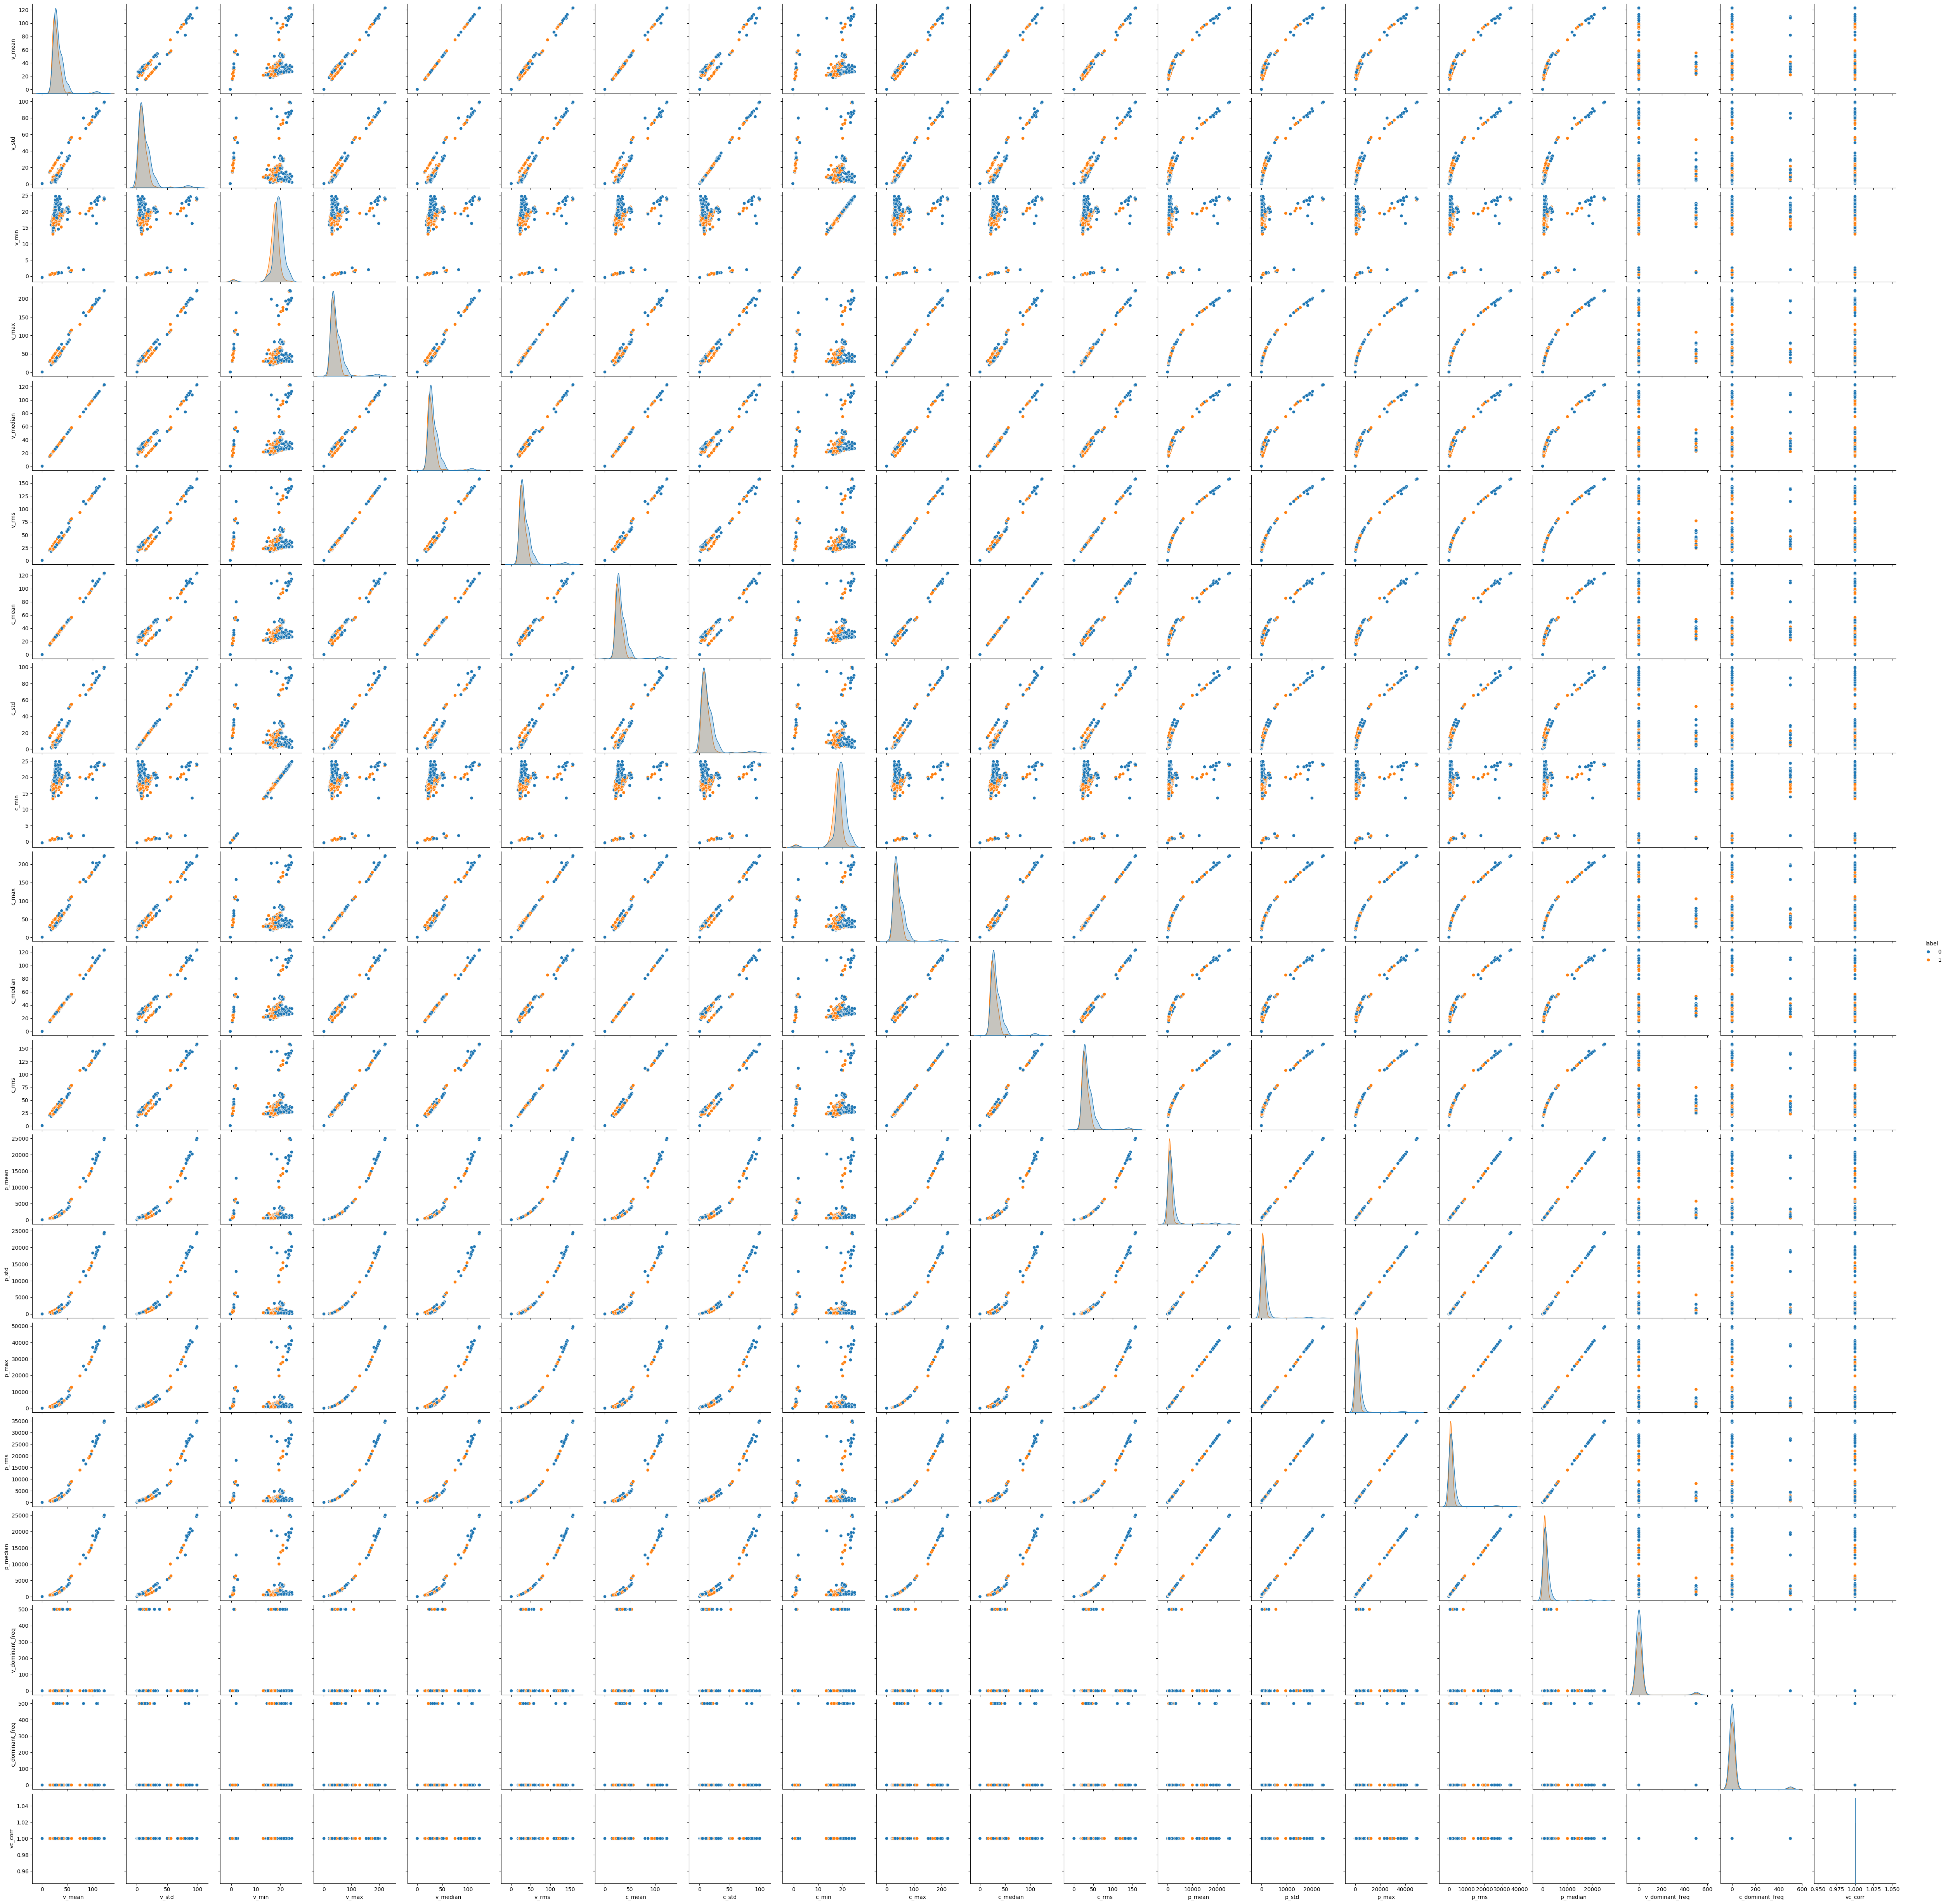

In [4]:
sns.pairplot(features, hue='label', diag_kind='kde')
plt.savefig(plot_path/"features_pairplot.png")
plt.show()

## Exercise 3.4: Describe Your Feature Selection

Based on the pairplot visualization from Exercise 3.1, provide a detailed analysis of your feature selection:

1. Which features appear most effective at separating the quality classes?
2. Are there features that show strong correlation with each other? Would it make sense to remove any redundant features?
3. Explain the physical significance of your selected features in the context of welding quality.
4. If you were to select a subset of 5 most important features for classifying welding quality, which would you choose and why?
5. Discuss any patterns or insights you discovered in the data visualization that might help with building a classification model.


### 3.4.1
- `p_mean` (mean power) forms distinct clusters in the plot, High or Low values seem to correlate with certain welding quality levels
 - The dominant frequencies `v_dominant_freq` (voltage) and `c_dominant_freq` (current) show patterns in sigal behaviour between different classes
 - `vc_corr` (correlation of voltage and current) implies that poor-quality welds tend to show weaker or noisier correlation between voltage and current
 - The standard deviations `v_std` (voltage) and `c_std` (current) correlate with unstable or inconsistent welding behaviour

### 3.4.2. A strong correlation can be seen between:
 - `v_mean` and `v_median`
 - `c_rms` and `c_std`
 - `p_mean` and `p_median`

If it becomes a problem we could abandon the medians and just use their respective means in order to avoid overfitting.
Right now, it doesn't seem necessary however.

### 3.4.3. 
- Power features: Reflect the actual energy transferred, which directly impacts weld quality.
    - A higher mean power often leads to deeper weld penetration, while excessive power might cause burn-through or overheating.
- Dominant frequencies: Help detect regular or irregular oscillations in the arc, which can signal defects or process instabilities.
    - Regular patterns may indicate a stable metal transfer mode, while erratic frequency components could signify short-circuiting or arc blow.
- Voltage-current correlation: Low correlation may indicate arc instability, poor grounding, or surface inconsistencies.
- Voltage & current features (mean, std, rms): Represent the electrical stability and energy delivery consistency.

 ### 3.4.4.
   1. p_mean – captures overall energy transfer.
   2. v_dominant_freq – frequency content reflects arc behavior.
   3. vc_corr – reflects stability and synchronicity of signals.
   4. c_std – measures current variability, often linked to arc instability.
   5. p_rms – a compact measure of power fluctuation and effective welding intensity.

### 3.4.5.
The pairplot revealed several key patterns:

- Distinct clusters in certain 2D feature combinations suggest that even simple models (e.g. decision trees or k-NN) may perform reasonably well.

- Outliers in features like v_max or c_max could represent defective welds or signal artifacts — preprocessing or outlier removal might help.

- Linearly separable patterns in features like vc_corr vs p_mean hint at possible performance gains from linear classifiers (e.g. logistic regression, LDA).

Overall, the visualization helped confirm which features carry the most discriminative power and which might be omitted without loss of performance.